In [1]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import seaborn as sns

In [2]:
def convertNtoC(U, UH, UL):
    x = (U - (UH+UL)/2) / ((UH-UL)/2)  
    return x

def convertCtoN(x, UH, UL):
    U = x*(UH-UL)/2 + (UH+UL)/2
    return U

In [87]:
data_1 = pd.read_csv('2k_data.csv').rename(columns={'Prev.Length':'prev_length', 'Match.Score':'match_score', 'Tile.Size':'tile_size', 'Prev.Type':'prev_type', 'Browse.Time':'browse_time'})
data_1.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

browse_time
prev_length match_score tile_size prev_type             
50          74          0.2       AC           17.575366
                                  TT           12.444984
                        0.4       AC           17.468381
                                  TT           12.533400
            90          0.2       AC           18.347400
                                  TT           13.289903
                        0.4       AC           18.154306
                                  TT           13.303781
90          74          0.2       AC           17.507624
                                  TT           12.678196
                        0.4       AC           17.658570
                                  TT           12.657490
            90          0.2       AC           20.574438
                                  TT           15.404821
                        0.4       AC           20.499997
                                  TT           15.303599

In [88]:
data_2 = pd.read_csv('2_k_centers.csv').rename(columns={'Prev.Length':'prev_length', 'Match.Score':'match_score', 'Tile.Size':'tile_size', 'Prev.Type':'prev_type', 'Browse.Time':'browse_time'})
data_2.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

browse_time
prev_length match_score tile_size prev_type             
70          82          0.3       AC           15.428617
                                  TT           10.742846

In [89]:
data_3 = pd.read_csv('gd_new_point_1.csv').rename(columns={'Prev.Length':'prev_length', 'Match.Score':'match_score', 'Tile.Size':'tile_size', 'Prev.Type':'prev_type', 'Browse.Time':'browse_time'})
data_3.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

,,,,browse_time
prev_length,match_score,tile_size,prev_type,
65,79,0.3,TT,11.013506


In [90]:
data_4 = pd.read_csv('gd_new_point_2.csv').rename(columns={'Prev.Length':'prev_length', 'Match.Score':'match_score', 'Tile.Size':'tile_size', 'Prev.Type':'prev_type', 'Browse.Time':'browse_time'})
data_4.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

,,,,browse_time
prev_length,match_score,tile_size,prev_type,
60,76,0.3,TT,11.606464


In [91]:
data_5 = pd.read_csv('gd_new_points_3.csv').rename(columns={'Prev.Length':'prev_length', 'Match.Score':'match_score', 'Tile.Size':'tile_size', 'Prev.Type':'prev_type', 'Browse.Time':'browse_time'})
data_5.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

,,,,browse_time
prev_length,match_score,tile_size,prev_type,
60,82,0.3,TT,11.414557
70,76,0.3,TT,10.484635


In [92]:
data_6 = pd.read_csv('new_points_4.csv').rename(columns={'Prev.Length':'prev_length', 'Match.Score':'match_score', 'Tile.Size':'tile_size', 'Prev.Type':'prev_type', 'Browse.Time':'browse_time'})
data_6.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

browse_time
prev_length match_score tile_size prev_type             
55          79          0.3       TT           11.832927
65          73          0.3       TT           10.780183
            85          0.3       TT           11.032854
75          79          0.3       TT           10.238236

In [93]:
data_7 = pd.read_csv('data_7.csv').rename(columns={'Prev.Length':'prev_length', 'Match.Score':'match_score', 'Tile.Size':'tile_size', 'Prev.Type':'prev_type', 'Browse.Time':'browse_time'})
data_7.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

browse_time
prev_length match_score tile_size prev_type             
75          73          0.3       TT           10.120102
            85          0.3       TT           11.490293
80          76          0.3       TT           10.616193
            82          0.3       TT           11.769689
85          79          0.3       TT           12.390959

In [145]:
data_8 = pd.read_csv('data_8.csv').rename(columns={'Prev.Length':'prev_length', 'Match.Score':'match_score', 'Tile.Size':'tile_size', 'Prev.Type':'prev_type', 'Browse.Time':'browse_time'})
data_8.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

browse_time
prev_length match_score tile_size prev_type             
75          75          0.3       TT           10.022093
            76          0.3       TT           10.029552
            77          0.3       TT           10.085783

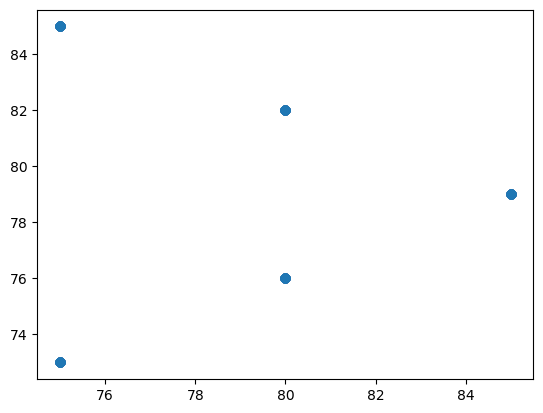

In [95]:
plt.scatter(data_7.prev_length, data_7.match_score)

In [121]:
all_data = data_1.append(data_2).append(data_3).append(data_4).append(data_5).append(data_6).append(data_7)#.append(data_8)

/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/740117559.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = data_1.append(data_2).append(data_3).append(data_4).append(data_5).append(data_6).append(data_7)#.append(data_8)
/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/740117559.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = data_1.append(data_2).append(data_3).append(data_4).append(data_5).append(data_6).append(data_7)#.append(data_8)
/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/740117559.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = data_1.append(data_2).append(data_3).append(data_4).append(data_5).append(data_6).append(data

In [122]:
all_data_tt = all_data[all_data.prev_type=='TT']
all_data_tt.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

browse_time
prev_length match_score tile_size prev_type             
50          74          0.2       TT           12.444984
                        0.4       TT           12.533400
            90          0.2       TT           13.289903
                        0.4       TT           13.303781
55          79          0.3       TT           11.832927
60          76          0.3       TT           11.606464
            82          0.3       TT           11.414557
65          73          0.3       TT           10.780183
            79          0.3       TT           11.013506
            85          0.3       TT           11.032854
70          76          0.3       TT           10.484635
            82          0.3       TT           10.742846
75          73          0.3       TT           10.120102
            79          0.3       TT           10.238236
            85          0.3       TT           11.490293
80          76          0.3       TT           10.616193
            82          0.3       TT           11.769689
85          79          0.3       TT           12.390959
90          74          0.2       TT           12.678196
                        0.4       TT           12.657490
            90          0.2       TT           15.404821
                        0.4       TT           15.303599

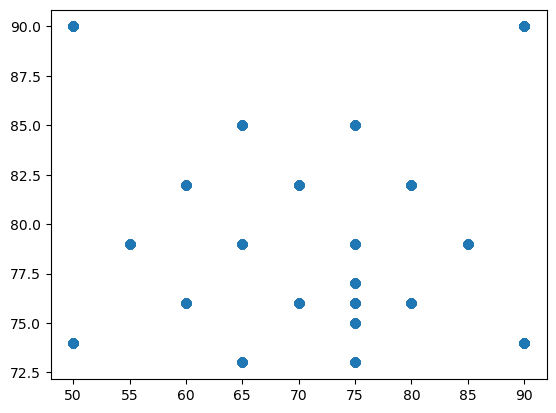

In [98]:
plt.scatter(all_data_tt.prev_length, all_data_tt.match_score)

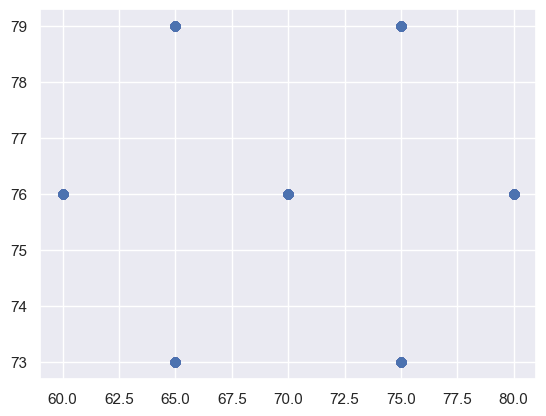

In [138]:
final_ccd = all_data_tt[(all_data_tt.match_score<80) & (all_data_tt.prev_length>55) & (all_data_tt.prev_length<85)]
plt.scatter(final_ccd.prev_length, final_ccd.match_score)

In [114]:
model = smf.ols('browse_time ~ prev_length + match_score + prev_length:match_score + I(prev_length**2) + I(match_score**2)', data = final_ccd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     41.96
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           2.84e-39
Time:                        18:59:29   Log-Likelihood:                -1457.9
No. Observations:                1000   AIC:                             2928.
Df Residuals:                     994   BIC:                             2957.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  88.4106     54.296      1.628      0.104     -18.138     194.959
prev_length                -1.0685      0.300     -3.556      0.000      -1.658      -0.479
match_score                -1.0449      1.312     -0.796      0.426      -3.620       1.530
prev_length:match_score    -0.0018      0.003     -0.531      0.596      -0.008       0.005
I(prev_length ** 2)         0.0082      0.001      7.338      0.000       0.006       0.010
I(match_score ** 2)         0.0079      0.008      0.930      0.352      -0.009       0.025
==============================================================================
Omnibus:                        0.999   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.866
Skew:                           0.048   Prob(JB):                        0.649
Kurtosis:                       3.108   Cond. No.                     1.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

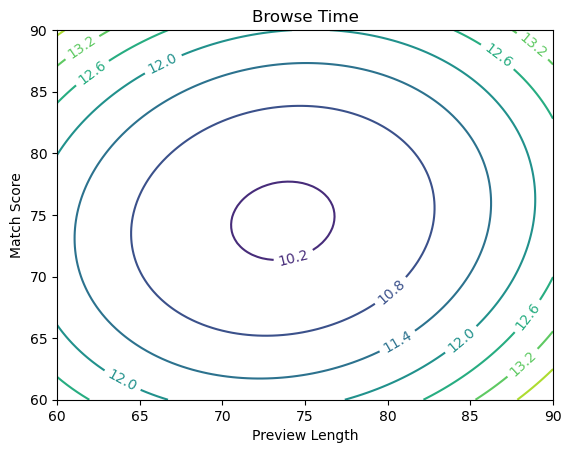

In [115]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
x1, x2 = np.meshgrid(np.linspace(60, 90, 100), 
                     np.linspace(60, 90,100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
# pi = np.exp(eta)/(1+np.exp(eta))
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('Preview Length')
plt.ylabel('Match Score')
plt.title('Browse Time')
plt.show()

In [116]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Browse time is minimized when preview length =", x_s[0], "and match score =", x_s[1])

Browse time is minimized when preview length = [[73.65770475]] and match score = [[74.52404456]]


In [117]:
eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b) 
eta_s

matrix([[10.12096765]])

## CCD for 70-76

In [123]:
data_55 = all_data_tt[all_data_tt.prev_length == 55]
data_60 = all_data_tt[all_data_tt.prev_length == 60]
data_65 = all_data_tt[all_data_tt.prev_length == 65]
data_70 = all_data_tt[all_data_tt.prev_length == 70]
data_75 = all_data_tt[all_data_tt.prev_length == 75]
data_80 = all_data_tt[all_data_tt.prev_length == 80]
data_85 = all_data_tt[all_data_tt.prev_length == 85]

In [54]:
data_ccd_70_76 = data_70[data_70.match_score==76]
data_ccd_70_76 = data_ccd_70_76.append(data_60[data_60.match_score==76])
data_ccd_70_76 = data_ccd_70_76.append(data_65[data_65.match_score==73])
data_ccd_70_76 = data_ccd_70_76.append(data_65[data_65.match_score==79])
data_ccd_70_76 = data_ccd_70_76.append(data_75[data_75.match_score==73])
data_ccd_70_76 = data_ccd_70_76.append(data_75[data_75.match_score==79])
data_ccd_70_76 = data_ccd_70_76.append(data_80[data_80.match_score==76])
data_ccd_70_76.groupby(['prev_length','match_score','tile_size','prev_type']).mean()

/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/1223348328.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ccd_70_76 = data_ccd_70_76.append(data_60[data_60.match_score==76])
/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/1223348328.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ccd_70_76 = data_ccd_70_76.append(data_65[data_65.match_score==73])
/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/1223348328.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ccd_70_76 = data_ccd_70_76.append(data_65[data_65.match_score==79])
/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/1223348328.py:5: FutureWarning: The frame.append method is deprec

browse_time
prev_length match_score tile_size prev_type             
60          76          0.3       TT           11.606464
65          73          0.3       TT           10.780183
            79          0.3       TT           11.013506
70          76          0.3       TT           10.484635
75          73          0.3       TT           10.120102
            79          0.3       TT           10.238236
80          76          0.3       TT           10.616193

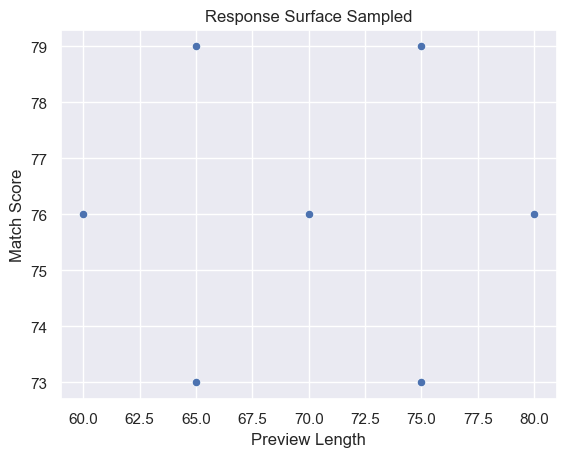

In [140]:
# plt.scatter(data_ccd_70_76.prev_length, data_ccd_70_76.match_score)
sns.set_theme(style="darkgrid")
fig1 = sns.scatterplot(x="prev_length",  y="match_score", data=data_ccd_70_76,ci=None)
fig1.set_xlabel("Preview Length")
fig1.set_ylabel("Match Score")

fig1.set_title("Response Surface Sampled")
# fig1.set_ylim(70,90)
# plt.show()
plt.savefig("conditions_step8.png")
plt.show()

In [151]:
model = smf.ols('browse_time ~ prev_length + match_score + prev_length:match_score + I(prev_length**2) + I(match_score**2)', data = data_ccd_70_76).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     26.39
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           1.88e-24
Time:                        23:15:37   Log-Likelihood:                -1034.2
No. Observations:                 700   AIC:                             2080.
Df Residuals:                     694   BIC:                             2108.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -33.5579     69.091     -0.486      0.627    -169.211     102.095
prev_length                -0.7884      0.326     -2.420      0.016      -1.428      -0.149
match_score                 1.9083      1.671      1.142      0.254      -1.372       5.188
prev_length:match_score    -0.0019      0.004     -0.541      0.589      -0.009       0.005
I(prev_length ** 2)         0.0063      0.001      4.805      0.000       0.004       0.009
I(match_score ** 2)        -0.0115      0.011     -1.056      0.291      -0.033       0.010
==============================================================================
Omnibus:                        2.328   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                2.149
Skew:                          -0.120   Prob(JB):                        0.341
Kurtosis:                       3.127   Cond. No.                     1.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

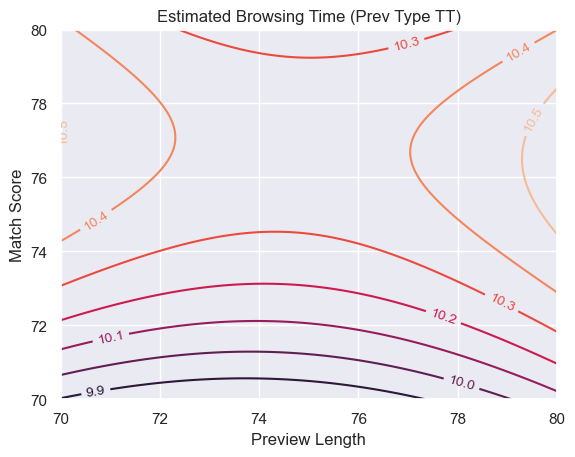

In [152]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
x1, x2 = np.meshgrid(np.linspace(70, 80, 100), 
                     np.linspace(70, 80,100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
# pi = np.exp(eta)/(1+np.exp(eta))
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('Preview Length')
plt.ylabel('Match Score')
plt.title('Estimated Browsing Time (Prev Type TT)')
plt.savefig("CCD3.png")
plt.show()

In [143]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Browse time is minimized when preview length =", x_s[0], "and match score =", x_s[1])

Browse time is minimized when preview length = [[74.67771297]] and match score = [[76.88464594]]


In [144]:
eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b) 
eta_s

matrix([[10.36443453]])

## CCD 75-79

In [119]:
data_55 = all_data_tt[all_data_tt.prev_length == 55]
data_60 = all_data_tt[all_data_tt.prev_length == 60]
data_65 = all_data_tt[all_data_tt.prev_length == 65]
data_70 = all_data_tt[all_data_tt.prev_length == 70]
data_75 = all_data_tt[all_data_tt.prev_length == 75]
data_80 = all_data_tt[all_data_tt.prev_length == 80]
data_85 = all_data_tt[all_data_tt.prev_length == 85]

/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/1752293721.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ccd_75_79 = data_ccd_75_79.append(data_70).append(data_75).append(data_80).append(data_85)
/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/1752293721.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ccd_75_79 = data_ccd_75_79.append(data_70).append(data_75).append(data_80).append(data_85)
/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/1752293721.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ccd_75_79 = data_ccd_75_79.append(data_70).append(data_75).append(data_80).append(data_85)
/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90

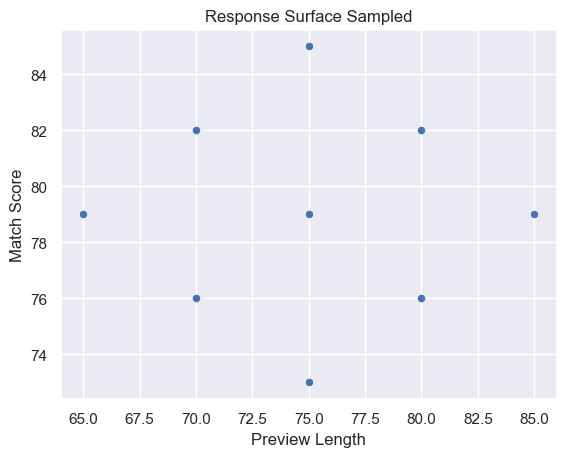

In [125]:
data_ccd_75_79 = data_65[data_65.match_score == 79]
data_ccd_75_79 = data_ccd_75_79.append(data_70).append(data_75).append(data_80).append(data_85)
# plt.scatter(data_ccd_75_79.prev_length, data_ccd_75_79.match_score)
sns.set_theme(style="darkgrid")
fig1 = sns.scatterplot(x="prev_length",  y="match_score", data=data_ccd_75_79,ci=None)
fig1.set_xlabel("Preview Length")
fig1.set_ylabel("Match Score")

fig1.set_title("Response Surface Sampled")
# fig1.set_ylim(70,90)
# plt.show()
plt.savefig("conditions_step6.png")
plt.show()

In [147]:
model = smf.ols('browse_time ~ prev_length + match_score + prev_length:match_score + I(prev_length**2) + I(match_score**2)', data = data_ccd_75_79).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     86.24
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           5.19e-74
Time:                        22:52:31   Log-Likelihood:                -1297.9
No. Observations:                 900   AIC:                             2608.
Df Residuals:                     894   BIC:                             2637.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 241.3346     31.639      7.628      0.000     179.239     303.430
prev_length                -3.1522      0.321     -9.830      0.000      -3.782      -2.523
match_score                -3.0317      0.566     -5.360      0.000      -4.142      -1.922
prev_length:match_score     0.0149      0.003      4.359      0.000       0.008       0.022
I(prev_length ** 2)         0.0136      0.001     11.838      0.000       0.011       0.016
I(match_score ** 2)         0.0128      0.003      4.024      0.000       0.007       0.019
==============================================================================
Omnibus:                        1.570   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.612
Skew:                          -0.100   Prob(JB):                        0.447
Kurtosis:                       2.946   Cond. No.                     9.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

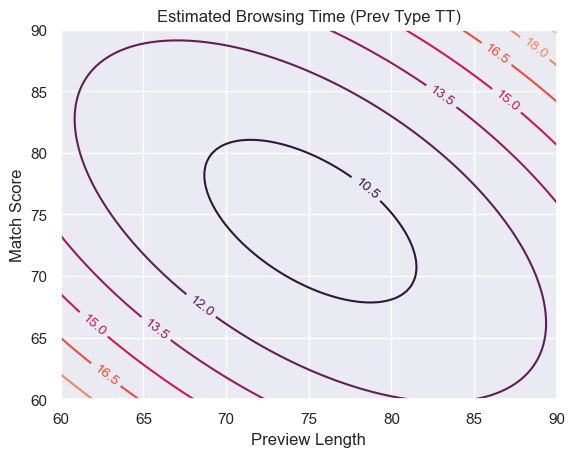

In [148]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
x1, x2 = np.meshgrid(np.linspace(60, 90, 100), 
                     np.linspace(60, 90,100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
# pi = np.exp(eta)/(1+np.exp(eta))
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('Preview Length')
plt.ylabel('Match Score')
plt.title('Estimated Browsing Time (Prev Type TT)')

plt.savefig("CCD2.png")
plt.show()

In [135]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Browse time is minimized when preview length =", x_s[0], "and match score =", x_s[1])

Browse time is minimized when preview length = [[75.09842733]] and match score = [[74.44967839]]


In [136]:
eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b) 
eta_s

matrix([[10.11891842]])

### CCD 75-75

/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/1889557792.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ccd_75_75 = data_ccd_75_75.append(data_75[data_75.match_score<80]).append(data_80[data_80.match_score == 76])
/var/folders/6h/jd79vvwj0kl6q1whqv2d2p900000gn/T/ipykernel_90417/1889557792.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ccd_75_75 = data_ccd_75_75.append(data_75[data_75.match_score<80]).append(data_80[data_80.match_score == 76])


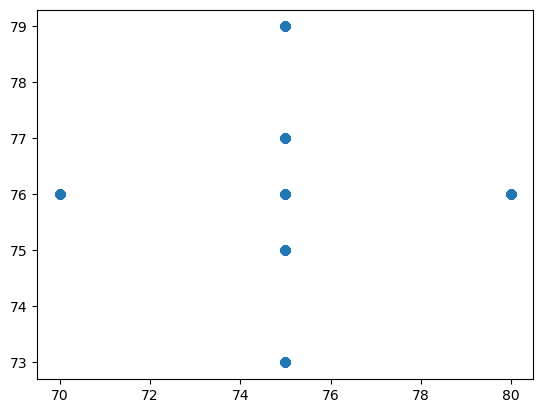

In [78]:
data_ccd_75_75 = data_70[data_70.match_score == 76]
data_ccd_75_75 = data_ccd_75_75.append(data_75[data_75.match_score<80]).append(data_80[data_80.match_score == 76])
# data_ccd_75_79 = data_ccd_75_79.append(data_70).append(data_75).append(data_80).append(data_85)
plt.scatter(data_ccd_75_75.prev_length, data_ccd_75_75.match_score)

In [79]:
model = smf.ols('browse_time ~ prev_length + match_score + prev_length:match_score + I(prev_length**2) + I(match_score**2)', data = data_ccd_75_75).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     7.601
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           5.37e-06
Time:                        18:35:40   Log-Likelihood:                -1019.4
No. Observations:                 700   AIC:                             2049.
Df Residuals:                     695   BIC:                             2072.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0030      0.000      6.549      0.000       0.002       0.004
prev_length                -0.1965      0.784     -0.251      0.802      -1.735       1.342
match_score                 0.4240      0.774      0.548      0.584      -1.096       1.944
prev_length:match_score    -0.0379      0.014     -2.760      0.006      -0.065      -0.011
I(prev_length ** 2)         0.0206      0.004      5.244      0.000       0.013       0.028
I(match_score ** 2)         0.0161      0.011      1.414      0.158      -0.006       0.038
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.754
Skew:                           0.054   Prob(JB):                        0.416
Kurtosis:                       3.221   Cond. No.                     1.29e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.14e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

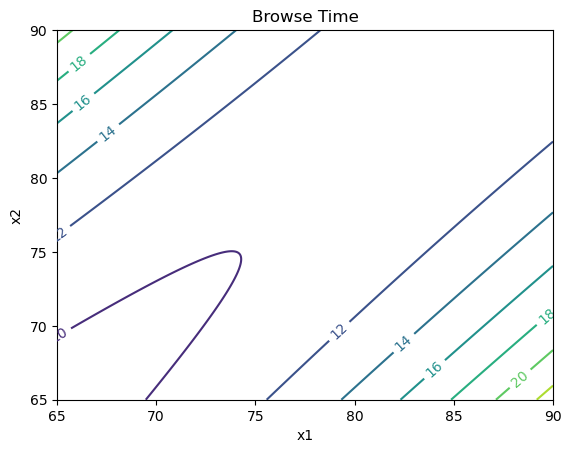

In [84]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
x1, x2 = np.meshgrid(np.linspace(65, 90, 1000), 
                     np.linspace(65, 90,1000))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
# pi = np.exp(eta)/(1+np.exp(eta))
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Browse Time')
plt.show()

In [85]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Browse time is minimized when preview length =", x_s[0], "and match score =", x_s[1])

Browse time is minimized when preview length = [[85.65798816]] and match score = [[87.93192355]]


In [86]:
eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b) 
eta_s

matrix([[10.22969835]])